# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV214"

In [3]:
LV_AXIS_THRESHOLD = 1.5  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
OUTPUT_FIGURES_DIR = Path(
    conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
).resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv214')

In [5]:
OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
display(OUTPUT_CELL_TYPE_FILEPATH)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv214/lv214-cell_types.svg')

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP055153, SRP060416, SRP042161, SRP033135, SRP064464, SRP057196, SRP033248, SRP042218, SRP009862, SRP059775, SRP011895, SRP066834, SRP058773, SRP012461, SRP009266, SRP043962, SRP055513, SRP065202, SRP039361, SRP056733, SRP012056, SRP018723, SRP064735, SRP018853, SRP027383, SRP010279, SRP057205, SRP058667, SRP028963, SRP050499, SRP007338, SRP059035, SRP059379, SRP004847, SRP007461, SRP045500, SRP006717, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (35 != 38)
  warnings.warn(


In [18]:
lv_data.shape

(6090, 85)

In [19]:
lv_data.head()

cell type cell line tonsil donor  \
project   run                                                                   
SRP055569 SRR1821717  MCF10a human breast cancer cells       NaN          NaN   
          SRR1821716  MCF10a human breast cancer cells       NaN          NaN   
          SRR1821715  MCF10a human breast cancer cells       NaN          NaN   
          SRR1821714  MCF10a human breast cancer cells       NaN          NaN   
          SRR1821713  MCF10a human breast cancer cells       NaN          NaN   

                     facs gating patient id subtype hour post serum-switch  \
project   run                                                                
SRP055569 SRR1821717         NaN        NaN     NaN                    NaN   
          SRR1821716         NaN        NaN     NaN                    NaN   
          SRR1821715         NaN        NaN     NaN                    NaN   
          SRR1821714         NaN        NaN     NaN                    NaN   
          SRR1821713         NaN        NaN     NaN                    NaN   

                     debris control well cells in well  ... index race  \
project   run                                           ...              
SRP055569 SRR1821717    NaN          NaN           NaN  ...   NaN  NaN   
          SRR1821716    NaN          NaN           NaN  ...   NaN  NaN   
          SRR1821715    NaN          NaN           NaN  ...   NaN  NaN   
          SRR1821714    NaN          NaN           NaN  ...   NaN  NaN   
          SRR1821713    NaN          NaN           NaN  ...   NaN  NaN   

                     samplename smoker time since last flare (months)  \
project   run                                                           
SRP055569 SRR1821717        NaN    NaN                            NaN   
          SRR1821716        NaN    NaN                            NaN   
          SRR1821715        NaN    NaN                            NaN   
          SRR1821714        NaN    NaN                            NaN   
          SRR1821713        NaN    NaN                            NaN   

                     time since steroid dose time since symptom onset (yrs)  \
project   run                                                                 
SRP055569 SRR1821717                     NaN                            NaN   
          SRR1821716                     NaN                            NaN   
          SRR1821715                     NaN                            NaN   
          SRR1821714                     NaN                            NaN   
          SRR1821713                     NaN                            NaN   

                     years since diagnosis sample type     LV214  
project   run                                                     
SRP055569 SRR1821717                   NaN         NaN -0.066819  
          SRR1821716                   NaN         NaN -0.004674  
          SRR1821715                   NaN         NaN  0.033694  
          SRR1821714                   NaN         NaN  0.000986  
          SRR1821713                   NaN         NaN  0.043743  

[5 rows x 85 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

overexpression                           0.049209
cell type                                0.039624
tonsil donor                             0.005440
facs gating                              0.005440
assigned cell type                       0.002436
ercc_dilution                            0.002436
ercc_mix                                 0.002436
cell count                               0.002436
qc pass                                  0.002436
sample type                              0.002257
sample molecule                          0.001967
c1 chip id                               0.001954
experiment_sample_name                   0.001954
transepithelial electrical resistance    0.001675
origen of cultured cells                 0.001675
reprogramming time point (day)           0.001616
well number                              0.001616
patient id                               0.001599
age                                      0.001543
tissue                                   0.001355


In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type         0.039624
tissue            0.001355
tissue subtype    0.000344
tissue type       0.000344
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP055569 SRR1821460  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821445  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821628                   MCF10a human breast cancer cells   
SRP055153 SRR1810661                                            no cell   
SRP060416 SRR2088143                       tonsil Innate lymphoid cells   
SRP055569 SRR1821431  mixture of U87 human glioma cells and MCF10a h...   
SRP042161 SRR1294847                                       Glioblastoma   
SRP060416 SRR2088180                       tonsil Innate lymphoid cells   
SRP033135 SRR1033120             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR1821415  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821430  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821372                             U87 human glioma cells   
SRP042161 SRR1294585                                       Glioblastoma   
SRP060416 SRR2088422                       tonsil Innate lymphoid cells   
SRP064464 SRR2558141                                                NaN   
SRP055569 SRR2019005                             U87 human glioma cells   
SRP060416 SRR2088138                       tonsil Innate lymphoid cells   
          SRR2088337                       tonsil Innate lymphoid cells   
          SRR2088336                       tonsil Innate lymphoid cells   
SRP055569 SRR2019201  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821436  mixture of U87 human glioma cells and MCF10a h...   
SRP057196 SRR1974652                                            neurons   
SRP060416 SRR2088313                       tonsil Innate lymphoid cells   
SRP055569 SRR1821408                             U87 human glioma cells   
SRP057196 SRR1974914                                  fetal_replicating   

                      tissue      LV214  
project   run                            
SRP055569 SRR1821460     NaN  11.652615  
          SRR1821445     NaN   0.717089  
          SRR1821628     NaN   0.687060  
SRP055153 SRR1810661     NaN   0.605851  
SRP060416 SRR2088143     NaN   0.569799  
SRP055569 SRR1821431     NaN   0.543467  
SRP042161 SRR1294847     NaN   0.542694  
SRP060416 SRR2088180     NaN   0.504226  
SRP033135 SRR1033120     NaN   0.469385  
SRP055569 SRR1821415     NaN   0.461302  
          SRR1821430     NaN   0.457129  
          SRR1821372     NaN   0.410536  
SRP042161 SRR1294585     NaN   0.403345  
SRP060416 SRR2088422     NaN   0.395812  
SRP064464 SRR2558141     NaN   0.385035  
SRP055569 SRR2019005     NaN   0.378400  
SRP060416 SRR2088138     NaN   0.371175  
          SRR2088337     NaN   0.321809  
          SRR2088336     NaN   0.311908  
SRP055569 SRR2019201     NaN   0.306689  
          SRR1821436     NaN   0.304299  
SRP057196 SRR1974652  cortex   0.301612  
SRP060416 SRR2088313     NaN   0.299228  
SRP055569 SRR1821408     NaN   0.298621  
SRP057196 SRR1974914  cortex   0.296993

In [25]:
# what is there in these projects?
lv_data.loc[["SRP064464"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

assigned cell type qc pass cell count ercc_mix  \
project   run                                                         
SRP064464 SRR2558141          undefined    TRUE          1     mix2   
          SRR2558177             acinar    TRUE          1     mix2   
          SRR2558167             acinar    TRUE          1     mix2   
          SRR2558115               duct    TRUE          1     mix2   
          SRR2558124                 pp    TRUE          1     mix2   
          SRR2558137             acinar    TRUE          1     mix2   
          SRR2558163             acinar    TRUE          1     mix2   
          SRR2558119          undefined    TRUE          1     mix2   
          SRR2558132               duct    TRUE          1     mix2   
          SRR2558129              alpha    TRUE          1     mix2   

                     ercc_dilution     LV214  
project   run                                 
SRP064464 SRR2558141       1000000  0.385035  
          SRR2558177       1000000  0.052542  
          SRR2558167       1000000  0.043450  
          SRR2558115       1000000  0.031574  
          SRR2558124       1000000  0.028743  
          SRR2558137       1000000  0.025740  
          SRR2558163       1000000  0.025590  
          SRR2558119       1000000  0.024138  
          SRR2558132       1000000  0.023136  
          SRR2558129       1000000  0.022304

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP055569 SRR1821460  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821445  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821628                   MCF10a human breast cancer cells   
SRP055153 SRR1810661                                            no cell   
SRP060416 SRR2088143                       tonsil Innate lymphoid cells   
SRP055569 SRR1821431  mixture of U87 human glioma cells and MCF10a h...   
SRP042161 SRR1294847                                       Glioblastoma   
SRP060416 SRR2088180                       tonsil Innate lymphoid cells   
SRP033135 SRR1033120             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR1821415  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821430  mixture of U87 human glioma cells and MCF10a h...   
          SRR1821372                             U87 human glioma cells   
SRP042161 SRR1294585                                       Glioblastoma   
SRP060416 SRR2088422                       tonsil Innate lymphoid cells   
SRP064464 SRR2558141                                    NOT CATEGORIZED   
SRP055569 SRR2019005                             U87 human glioma cells   
SRP060416 SRR2088138                       tonsil Innate lymphoid cells   
          SRR2088337                       tonsil Innate lymphoid cells   
          SRR2088336                       tonsil Innate lymphoid cells   
SRP055569 SRR2019201  mixture of U87 human glioma cells and WI-38 hu...   

                          LV214  
project   run                    
SRP055569 SRR1821460  11.652615  
          SRR1821445   0.717089  
          SRR1821628   0.687060  
SRP055153 SRR1810661   0.605851  
SRP060416 SRR2088143   0.569799  
SRP055569 SRR1821431   0.543467  
SRP042161 SRR1294847   0.542694  
SRP060416 SRR2088180   0.504226  
SRP033135 SRR1033120   0.469385  
SRP055569 SRR1821415   0.461302  
          SRR1821430   0.457129  
          SRR1821372   0.410536  
SRP042161 SRR1294585   0.403345  
SRP060416 SRR2088422   0.395812  
SRP064464 SRR2558141   0.385035  
SRP055569 SRR2019005   0.378400  
SRP060416 SRR2088138   0.371175  
          SRR2088337   0.321809  
          SRR2088336   0.311908  
SRP055569 SRR2019201   0.306689

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [36]:
_srp_code = "SRP057196"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: lv_data.loc[(_srp_code, x.name), 'tissue'],
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
# _srp_code = "SRP045500"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"{lv_data.loc[(_srp_code, x.name), 'celltype']}"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'diseasestatus']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [38]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [39]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [40]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [41]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [42]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [43]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [44]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [45]:
len(attr_order)

15

In [46]:
attr_order[:5]

['Glioma + MCF10 breast cancer cells',
 'MCF10a human breast cancer cells',
 'no cell',
 'tonsil Innate lymphoid cells (ILC3)',
 'Glioblastoma']

## Plot

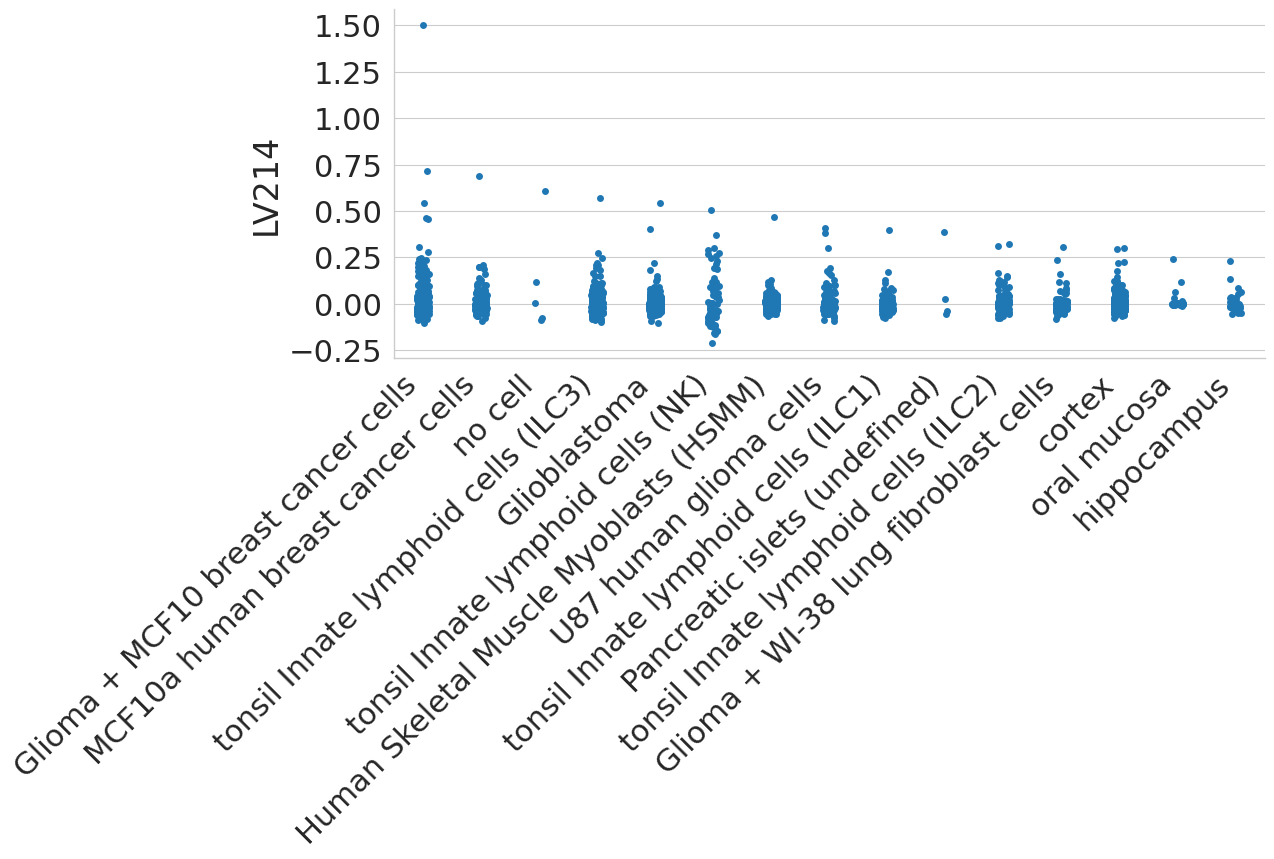

In [47]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [48]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [65]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("cortex")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV214
project   run                                  
SRP057196 SRR1974652           cortex  0.301612
          SRR1974914           cortex  0.296993
          SRR1974877           cortex  0.225505
          SRR1974964           cortex  0.221924
          SRR1974647           cortex  0.174494
SRP066834 SRR2967799  Fetal neocortex  0.156830
          SRR2967815  Fetal neocortex  0.146193
SRP057196 SRR1974804           cortex  0.144796
SRP066834 SRR2967624  Fetal neocortex  0.132106
          SRR2967784  Fetal neocortex  0.125437
          SRR2967613  Fetal neocortex  0.125277
SRP057196 SRR1974722           cortex  0.123550
          SRR1974850           cortex  0.121201
SRP066834 SRR2967777  Fetal neocortex  0.116597
SRP057196 SRR1974760           cortex  0.116419
SRP066834 SRR2967772  Fetal neocortex  0.102292
SRP057196 SRR1974993           cortex  0.101478
          SRR1974666           cortex  0.099856
          SRR1974692           cortex  0.099597
SRP066834 SRR2967673  Fetal neocortex  0.095035

In [50]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP057196"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell type       tissue                 age  \
project   run                                                              
SRP057196 SRR1974652            neurons       cortex  postnatal 37 years   
          SRR1974914  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974581                OPC  hippocampus  postnatal 54 years   
          SRR1974877  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974964    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974647         astrocytes       cortex  postnatal 37 years   
          SRR1974804             hybrid       cortex  postnatal 21 years   
          SRR1974590          microglia  hippocampus  postnatal 54 years   
          SRR1974722         astrocytes       cortex  postnatal 50 years   
          SRR1974850             hybrid       cortex  postnatal 21 years   
          SRR1974760   oligodendrocytes       cortex  postnatal 63 years   
          SRR1974993    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974666          microglia       cortex  postnatal 47 years   
          SRR1974692         astrocytes       cortex  postnatal 50 years   
          SRR1974840         astrocytes       cortex  postnatal 21 years   
          SRR1974796   oligodendrocytes  hippocampus  postnatal 63 years   
          SRR1974613            neurons       cortex  postnatal 37 years   
          SRR1974610         astrocytes       cortex  postnatal 37 years   
          SRR1974810            neurons       cortex  postnatal 21 years   
          SRR1974932    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974775            neurons       cortex  postnatal 63 years   
          SRR1974574   oligodendrocytes       cortex  postnatal 54 years   
          SRR1974874         astrocytes       cortex  postnatal 47 years   
          SRR1974834   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974883  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974963    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974896  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974588                OPC  hippocampus  postnatal 54 years   
          SRR1974605            neurons       cortex  postnatal 37 years   
          SRR1974971    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974823            neurons       cortex  postnatal 21 years   
          SRR1974949    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974839   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974695             hybrid       cortex  postnatal 50 years   
          SRR1975000    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974697            neurons       cortex  postnatal 50 years   
          SRR1975003    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1975005    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974753         astrocytes       cortex  postnatal 50 years   
          SRR1974577             hybrid  hippocampus  postnatal 54 years   
          SRR1974975    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974984    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974948    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974661            neurons       cortex  postnatal 37 years   
          SRR1974628            neurons       cortex  postnatal 37 years   
          SRR1974865         astrocytes       cortex  postnatal 47 years   
          SRR1974879  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974667        endothelial       cortex  postnatal 47 years   
          SRR1974744         astrocytes       cortex  postnatal 50 years   
          SRR1974554             hybrid       cortex  postnatal 54 years   
          SRR1974940    fetal_quiescent       cortex    prenatal 16-18 W   
  

In [51]:
# _tmp["facs gating"].value_counts()

# Reduced plot

## Data stats

In [52]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

count    6090.000000
mean        0.003645
std         0.050424
min        -0.209359
25%        -0.016435
50%        -0.003829
75%         0.011835
max         1.500000
Name: LV214, dtype: float64

In [67]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

,count,mean,std,min,25%,50%,75%,max
cell type,,,,,,,,
M1-polarized HMDM,3.0,0.086652,0.022073,0.061396,0.078849,0.096302,0.099279,0.102256
amnion,7.0,0.052700,0.036847,0.004368,0.024809,0.053848,0.076499,0.108068
M1-polarized IPSDM,6.0,0.044872,0.020623,0.020046,0.028001,0.046956,0.058411,0.071365
Epithelial cell,2.0,0.044703,0.221831,-0.112156,-0.033727,0.044703,0.123132,0.201561
Embryonic kidney cells,6.0,0.049509,0.026794,0.022827,0.033376,0.043677,0.055211,0.097873
...,...,...,...,...,...,...,...,...
Glioma + WI-38 lung fibroblast cells,129.0,-0.002624,0.047896,-0.080020,-0.025249,-0.012023,0.003468,0.306689
Pancreatic islets (NA),6.0,-0.014359,0.008584,-0.023688,-0.022012,-0.013620,-0.007477,-0.004989
Differentiated Glioma Cell Line,3.0,-0.012321,0.006073,-0.017531,-0.015656,-0.013782,-0.009717,-0.005652


In [54]:
# keep cell types whose count is not too low and median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["count"] > 3)
    & (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

Index(['amnion', 'M1-polarized IPSDM', 'Embryonic kidney cells', 'placenta',
       'epithelial cell', 'Pancreatic islets (acinar)', 'PDX', 'tongue',
       'Pancreatic islets (alpha)', 'skin', 'fixed cell', 'stomach', 'no cell',
       'eye', 'iPSC derived macrophage (IPSDM)',
       'Dissociated whole cerebral organoid',
       'Glioma + MCF10 breast cancer cells',
       'Human Skeletal Muscle Myoblasts (HSMM)', 'kidney', 'intestine',
       'tonsil Innate lymphoid cells (ILC2)',
       'Induced pluripotent stem cell (iPSC)', 'cord',
       'MCF10a human breast cancer cells'],
      dtype='object', name='cell type')

In [55]:
final_plot_data.shape

(6090, 2)

In [56]:
reduced_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [57]:
reduced_plot_data.shape

(1461, 2)

## Shorten context names

In [58]:
reduced_plot_data = reduced_plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "tonsil Innate lymphoid cells (ILC3)": "tonsil ILCs (ILC3)",
            "tonsil Innate lymphoid cells (NK)": "tonsil ILCs (NK)",
            "tonsil Innate lymphoid cells (ILC2)": "tonsil ILCs (ILC2)",
            "tonsil Innate lymphoid cells (ILC1)": "tonsil ILCs (ILC1)",
            "primary human NK cells": "NK cells",
            "primary human neutrophils": "Neutrophils",
            "Head and Neck Squamous Cell Carcinoma cells": "Squamous Cell Carcinoma cells",
            "NG2-sorted cell from blood of melanoma patient": "Blood (melanoma)",
            "ER+ Breast Cancer Primary Tumor": "Breast Cancer (ER+)",
        }
    }
)

In [59]:
reduced_plot_data = reduced_plot_data[
    ~reduced_plot_data[SELECTED_ATTRIBUTE].isin((
        "NOT CATEGORIZED",
        "hybrid",
        "fixed cell",
    ))
]

In [60]:
reduced_plot_data.shape

(1447, 2)

## Set x-axis order

In [61]:
attr_order = (
    reduced_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:8]
    .tolist()
)

In [62]:
len(attr_order)

8

In [63]:
attr_order

['Glioma + MCF10 breast cancer cells',
 'MCF10a human breast cancer cells',
 'no cell',
 'Human Skeletal Muscle Myoblasts (HSMM)',
 'tonsil ILCs (ILC2)',
 'Dissociated whole cerebral organoid',
 'amnion',
 'Embryonic kidney cells']

## Plot

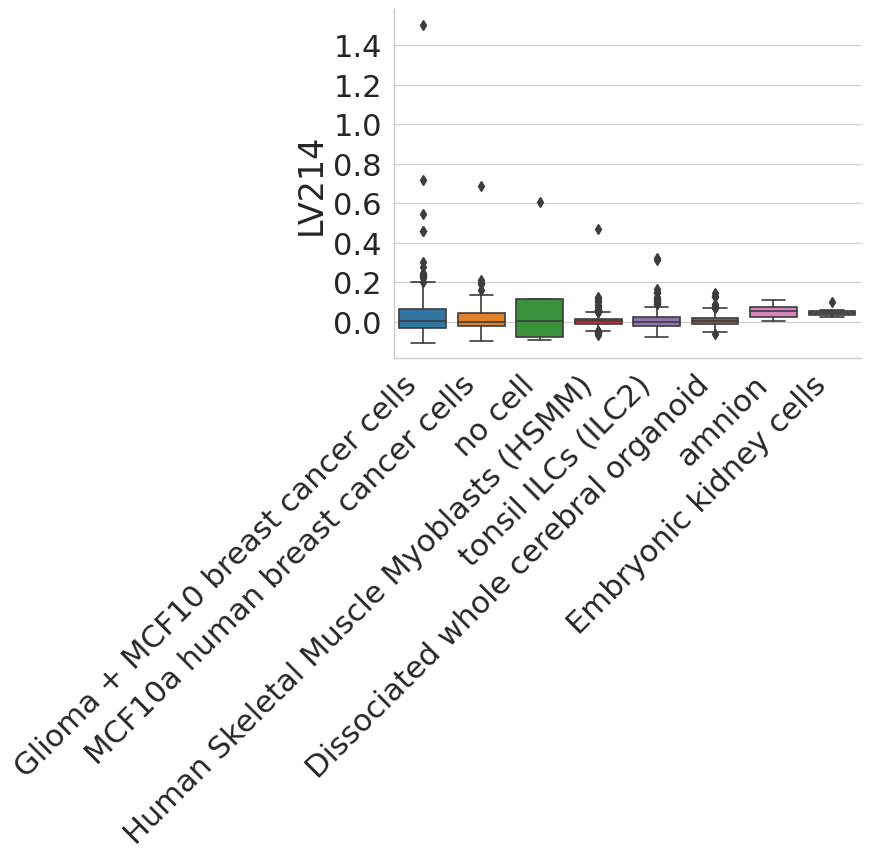

In [64]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=reduced_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=1.8,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    plt.savefig(
        OUTPUT_CELL_TYPE_FILEPATH,
        bbox_inches="tight",
        facecolor="white",
    )